# Dimension Reduction
This file aims to have data visualization using two dimension reduction technique: t-SNE and PCA, projecting data points onto 3D space. We did this visualization for 5 music genres, 3 genres, and 2 genres, respectively. Based on the resulting graphs, we can see that t-SNE seems to be better at distinguishing between different genres since there are fewer overlaps between clusters. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from dependencies import utils

In [2]:
tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

## Visualizing 5 Genres in 3D Space

In [3]:
# Scale the data for 5 genres
from sklearn.preprocessing import StandardScaler

small = tracks['set', 'subset'] <= 'small'

genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Folk'
genre3 = tracks['track', 'genre_top'] == 'Electronic'
genre4 = tracks['track', 'genre_top'] == 'Instrumental'
genre5 = tracks['track', 'genre_top'] == 'Hip-Hop'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train & (
    genre1 | genre2 | genre3 | genre4 | genre5), ('track', 'genre_top')]
y_test = tracks.loc[small & test & (
    genre1 | genre2 | genre3 | genre4 | genre5), ('track', 'genre_top')]
X_train = features.loc[small & train & (
    genre1 | genre2 | genre3 | genre4 | genre5)]
X_test = features.loc[small & test & (
    genre1 | genre2 | genre3 | genre4 | genre5)]

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train.shape


c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(4000, 518)

In [4]:
sns.set(style="darkgrid")

# this function takes in a dataframe that has three columns
# plot it in 3D space and show the plot
def plot3d(df):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    for g in df.label.unique():
        ax.scatter(df.col1[df.label == g], df.col2[df.label ==
                   g], df.col3[df.label == g], label=g)
    ax.legend()
    plt.show()


c:\Users\groot\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


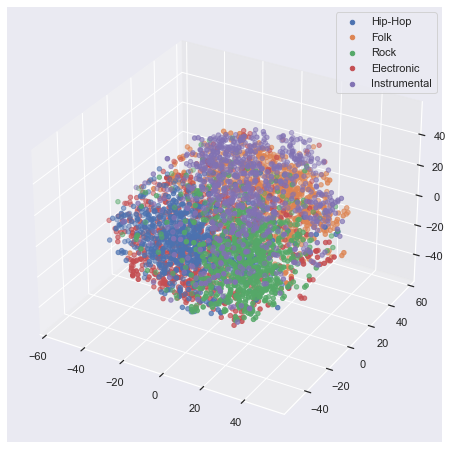

In [5]:
# https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# this function takes in X_train and y_train and transform them using t-SNE 
def tsne(X_train, y_train):
    tsne = TSNE(n_components=3)
    tsne_result = tsne.fit_transform(X_train)
    return pd.DataFrame(
        {'col1': tsne_result[:, 0], 'col2': tsne_result[:, 1], 'col3': tsne_result[:, 2], 'label': y_train})


plot3d(tsne(X_train, y_train))


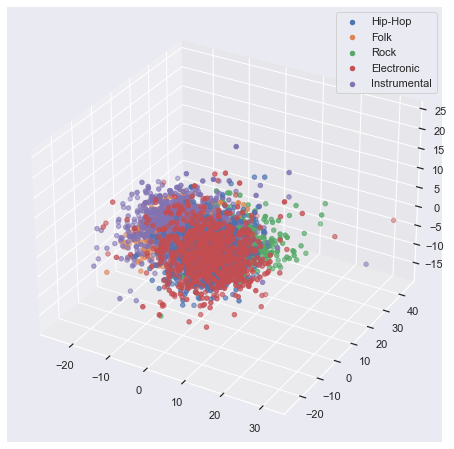

In [6]:
from sklearn.decomposition import PCA

# this function takes in X_train and y_train and transform them using PCA
def pca(X_train, y_train):
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(X_train)
    return pd.DataFrame({'col1': pca_result[:, 0], 'col2': pca_result[:, 1], 'col3': pca_result[:, 2], 'label': y_train})


plot3d(pca(X_train, y_train))


## Visualizing 3 Genres in 3D Space

In [7]:
# Rescale the data for 3 genres
y_train = tracks.loc[small & train & (
    genre1 | genre2 | genre3), ('track', 'genre_top')]
y_test = tracks.loc[small & test & (
    genre1 | genre2 | genre3 ), ('track', 'genre_top')]
X_train = features.loc[small & train & (
    genre1 | genre2 | genre3)]
X_test = features.loc[small & test & (
    genre1 | genre2 | genre3)]

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


c:\Users\groot\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


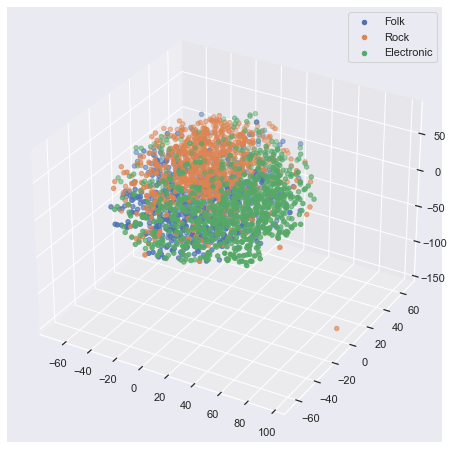

In [8]:
plot3d(tsne(X_train, y_train))

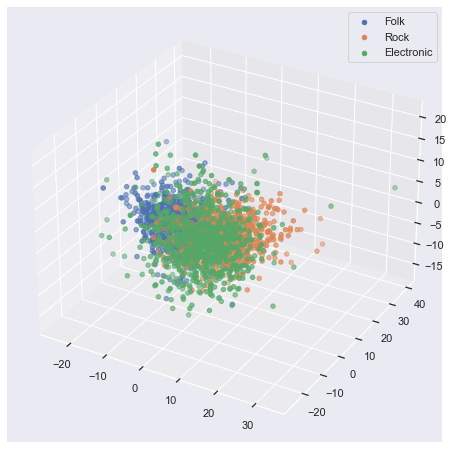

In [9]:
plot3d(pca(X_train, y_train))

## Visualizing 2 Genres in 3D Space

In [10]:
# Rescale data for 2 genres
y_train = tracks.loc[small & train & (
    genre1 | genre2 ), ('track', 'genre_top')]
y_test = tracks.loc[small & test & (
    genre1 | genre2 ), ('track', 'genre_top')]
X_train = features.loc[small & train & (
    genre1 | genre2 )]
X_test = features.loc[small & test & (
    genre1 | genre2 )]

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


c:\Users\groot\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


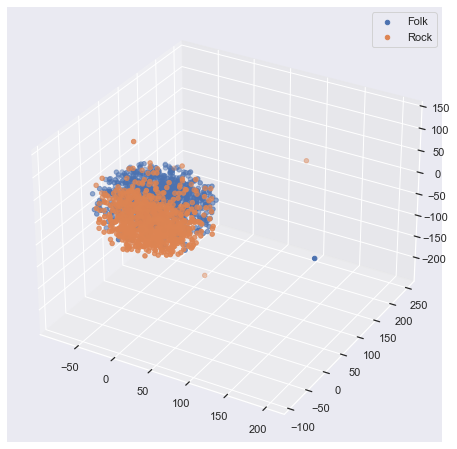

In [11]:
plot3d(tsne(X_train, y_train))

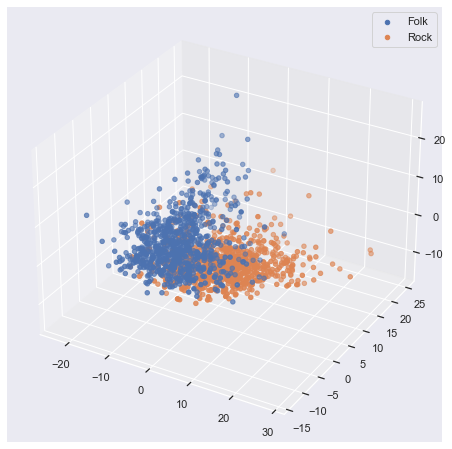

In [12]:
plot3d(pca(X_train, y_train))